## Title of Project: BANK CUSTOMER CHURN MODEL

## **Objective**

1. DATA ENCODING 
2. FEATURE SCALING
3. HANDLING IMBALANCE DATA 
   A. RANDOM UNDER SAMPLING 
   B. RANDOM OVER SAMPLING 
4. SUPPORT VECTOR MACHINE CLASSIFIRE 
5. GRID SEARCH FOR HYPERPARAMETER TUNNING 

## **Data Source**

Bank Churn Modelling

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('Bank Churn Modelling.csv')

## **Describe Data**

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df=df.set_index('CustomerId')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


 ## Encoding

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [12]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,2,1,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,2,1,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  int64  
 3   Gender            10000 non-null  int64  
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1015.6+ KB


In [14]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
df.replace({'Num of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [16]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [18]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [19]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<AxesSubplot:>

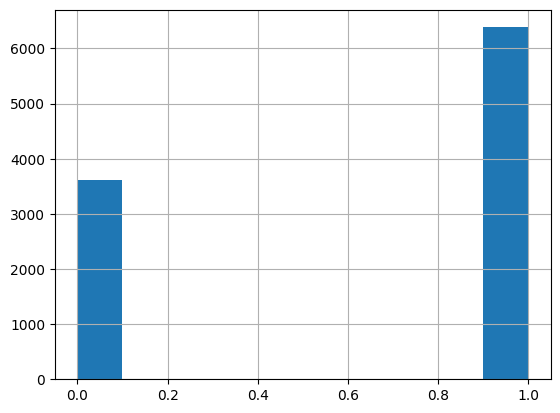

In [20]:
df['Zero Balance'].hist()

## Define Label and Features

In [21]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [22]:
X = df.drop(['Surname','Churn'],axis=1)

In [23]:
y = df['Churn']

In [24]:
X.shape,y.shape

((10000, 11), (10000,))

In [25]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

## Random Under Sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
rus = RandomUnderSampler(random_state=2529)

In [28]:
X_rus, y_rus = rus.fit_resample(X, y)

In [29]:
X_rus.shape, y_rus.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [30]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [31]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

## Random Over Sampling 

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
ros = RandomOverSampler(random_state=2529)

In [34]:
X_ros,y_ros = ros.fit_resample(X,y)

In [35]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [36]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

## Split Original Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

## Split Random Under Sample Data

In [39]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

## Split Random Over Sample Data

In [40]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

## Standardize Feature

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

## Standardize Original Data

In [43]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random Under Sample  Data

In [51]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random Over Sample Data

In [52]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

###

## Suport Vector Machine Classifier

In [53]:
from sklearn.svm import SVC

In [45]:
svc=SVC()

In [46]:
svc.fit(X_train,y_train)

SVC()

In [47]:
y_pred = svc.predict(X_test)

## Model Accuracy 

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
confusion_matrix(y_test,y_pred)

array([[2378,   41],
       [ 376,  205]], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2419
           1       0.83      0.35      0.50       581

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



## Hyper-parameter Tunning (Original Data)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_frid = {'C': [0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel': ['rbf'],
             'class_weight': ['balanced']}

In [67]:
grid = GridSearchCV(SVC(),param_frid,refit=True,verbose=2, cv= 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [68]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [69]:
grid_predictions = grid.predict(X_test)

In [70]:
confusion_matrix(y_test,grid_predictions)

array([[2203,  216],
       [ 362,  219]], dtype=int64)

In [72]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2419
           1       0.50      0.38      0.43       581

    accuracy                           0.81      3000
   macro avg       0.68      0.64      0.66      3000
weighted avg       0.79      0.81      0.80      3000



## Model with Under Sampling 

In [64]:
svc_rus = SVC()

In [55]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [56]:
y_pred_rus = svc_rus.predict(X_test_rus)

## Model Accuracy for Under Sampling 

In [57]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[496, 107],
       [173, 447]], dtype=int64)

In [58]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       603
           1       0.81      0.72      0.76       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



## Hyper-parameter Tunning  for Under Sampling Model

In [73]:
param_frid = {'C': [0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel': ['rbf'],
             'class_weight': ['balanced']}

In [86]:
grid_rus = GridSearchCV(SVC(),param_frid,refit=True,verbose=2, cv= 2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [75]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.1)


In [76]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [77]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[477, 126],
       [155, 465]], dtype=int64)

In [78]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.79      0.75      0.77       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



## Model with Over Sampling 

In [59]:
svc_ros = SVC()

In [60]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [61]:
y_pred_ros = svc_ros.predict(X_test_ros)

## Model Accuracy for Over Sampling 

In [62]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1944,  482],
       [ 527, 1825]], dtype=int64)

In [63]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2426
           1       0.79      0.78      0.78      2352

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



## Hyper-parameter Tunning  for Over Sampling Model

In [87]:
param_frid = {'C': [0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel': ['rbf'],
             'class_weight': ['balanced']}

In [88]:
grid_ros = GridSearchCV(SVC(),param_frid,refit=True,verbose=2, cv= 2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [90]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [91]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2109,  317],
       [  85, 2267]], dtype=int64)

In [92]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2426
           1       0.88      0.96      0.92      2352

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# Lasr Compare

### Original Data

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2419
           1       0.83      0.35      0.50       581

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



In [94]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2419
           1       0.50      0.38      0.43       581

    accuracy                           0.81      3000
   macro avg       0.68      0.64      0.66      3000
weighted avg       0.79      0.81      0.80      3000



## Under Sampling Data

In [95]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       603
           1       0.81      0.72      0.76       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



In [96]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.79      0.75      0.77       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



## Over Sampling Data

In [97]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2426
           1       0.79      0.78      0.78      2352

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [98]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2426
           1       0.88      0.96      0.92      2352

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

